In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

#### **Objective**

Based on the dataset from [https://archive.ics.uci.edu/dataset/247/istanbul\+stock\+exchange](https://archive.ics.uci.edu/dataset/247/istanbul+stock+exchange), Our aim is to predict stock returns for the Istanbul Stock Exchange dataset spanning from June 5, 2009, to February 22, 2011.


###### **Data Preparation and Cleaning**

Preliminary Feature Selection

Dropping NaNs



In [4]:
data = pd.read_csv('Istanbul_Stock.csv')
data.head()

,date,TL_BASED_ISE,USD_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [5]:
data.shape

(536, 10)

In [6]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (536, 10)


In [7]:
# Information about the Variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           536 non-null    object 
 1   TL_BASED_ISE   536 non-null    float64
 2   USD_BASED_ISE  536 non-null    float64
 3   SP             536 non-null    float64
 4   DAX            536 non-null    float64
 5   FTSE           536 non-null    float64
 6   NIKKEI         536 non-null    float64
 7   BOVESPA        536 non-null    float64
 8   EU             536 non-null    float64
 9   EM             536 non-null    float64
dtypes: float64(9), object(1)
memory usage: 42.0+ KB


In [8]:
# Check missing values in data
data.isnull().sum()

date             0
TL_BASED_ISE     0
USD_BASED_ISE    0
SP               0
DAX              0
FTSE             0
NIKKEI           0
BOVESPA          0
EU               0
EM               0
dtype: int64

In [9]:
data1 = data.drop('USD_BASED_ISE', axis=1)
data1

,date,TL_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,17-Feb-11,0.009310,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,18-Feb-11,0.000191,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,21-Feb-11,-0.013069,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


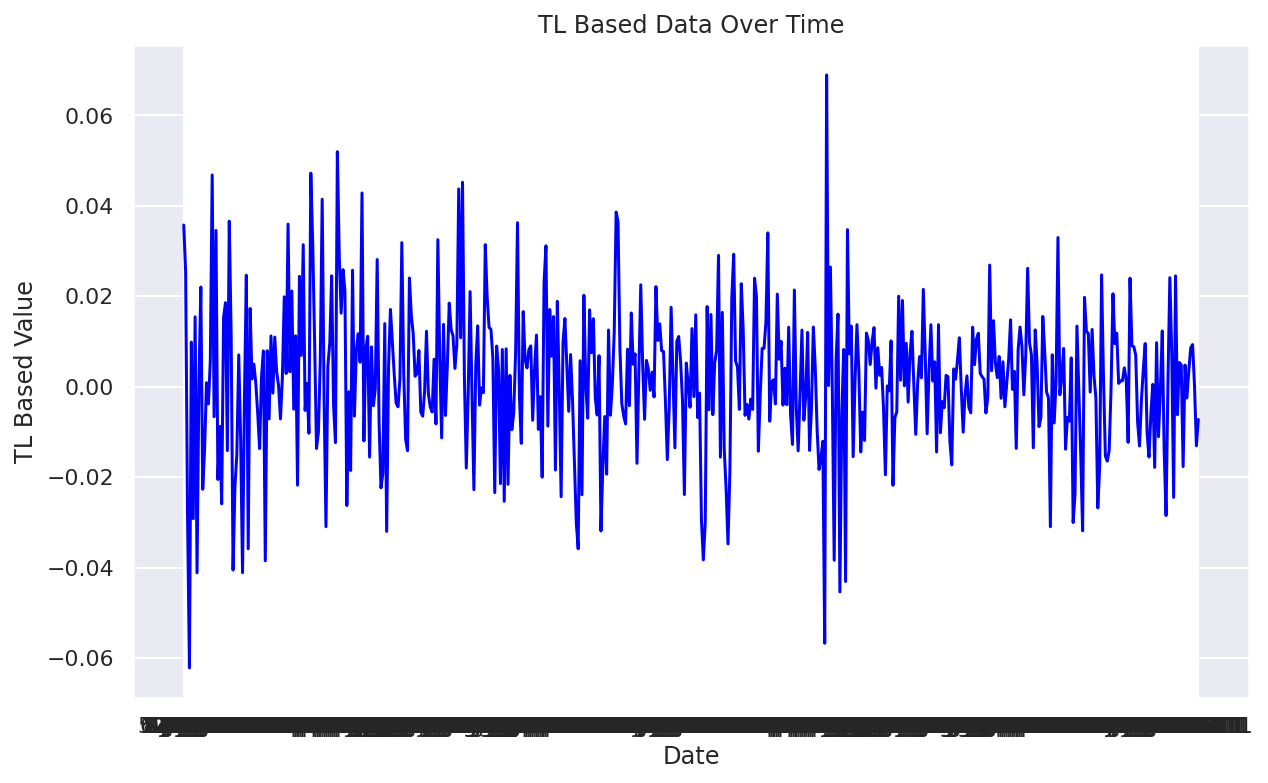

In [10]:
# Plot TL based data over time to select as possible response predictor
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['TL_BASED_ISE'], color='blue')
plt.title('TL Based Data Over Time')
plt.xlabel('Date')
plt.ylabel('TL Based Value')
plt.grid(True)
plt.show()

In [11]:
def calculate_macd(data1, n_fast=12, n_slow=26, n_signal=9):
    """
    Calculate MACD line given a pandas DataFrame of historical prices.
    """
    # Calculate the fast and slow EMA
    ema_fast = data1['TL_BASED_ISE'].ewm(span=n_fast, min_periods=1).mean()  # Adjusted min_periods to 1
    ema_slow = data1['TL_BASED_ISE'].ewm(span=n_slow, min_periods=1).mean()  # Adjusted min_periods to 1

    # Calculate the MACD line
    macd_line = ema_fast - ema_slow

    # Calculate the signal line
    signal_line = macd_line.ewm(span=n_signal, min_periods=1).mean()  # Adjusted min_periods to 1

    return macd_line, signal_line

# Load historical data into a pandas DataFrame
data = pd.read_csv('Istanbul_Stock.csv', index_col='date', parse_dates=True)
data = data['2009-01-01':'2011-12-31']  # Adjusted date range to ensure sufficient data

# Calculate the MACD line and signal line
macd_line, signal_line = calculate_macd(data1)

# Create a DataFrame for the signals
signals_df = pd.DataFrame({'MACD Line': macd_line, 'Signal Line': signal_line})

# Concatenate the signals DataFrame with the original DataFrame
df_with_signals = pd.concat([data1, signals_df], axis=1)

# Create Buy/Hold/Sell column based on MACD crossover
df_with_signals['Buy/Hold/Sell'] = 'Hold'
df_with_signals.loc[df_with_signals['MACD Line'] > df_with_signals['Signal Line'], 'Buy/Hold/Sell'] = 'Buy'
df_with_signals.loc[df_with_signals['MACD Line'] < df_with_signals['Signal Line'], 'Buy/Hold/Sell'] = 'Sell'

# Print the DataFrame to check for NaN values
df_with_signals.head()


/tmp/ipykernel_458/3662795154.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Istanbul_Stock.csv', index_col='date', parse_dates=True)


,date,TL_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,MACD Line,Signal Line,Buy/Hold/Sell
0,5-Jan-09,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.000000,0.000000,Hold
1,6-Jan-09,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,-0.000232,-0.000129,Sell
2,7-Jan-09,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.001979,-0.000887,Sell
3,8-Jan-09,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.003929,-0.001917,Sell
4,9-Jan-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,-0.002038,-0.001953,Sell


In [12]:
df_with_signals.to_pickle('dataset.pickle')
df_with_signals

,date,TL_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,MACD Line,Signal Line,Buy/Hold/Sell
0,5-Jan-09,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.000000,0.000000,Hold
1,6-Jan-09,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,-0.000232,-0.000129,Sell
2,7-Jan-09,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.001979,-0.000887,Sell
3,8-Jan-09,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.003929,-0.001917,Sell
4,9-Jan-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,-0.002038,-0.001953,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039,0.001088,0.000373,Buy
532,17-Feb-11,0.009310,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039,0.001662,0.000630,Buy
533,18-Feb-11,0.000191,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938,0.001366,0.000778,Buy
534,21-Feb-11,-0.013069,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958,0.000061,0.000634,Sell


<Axes: >

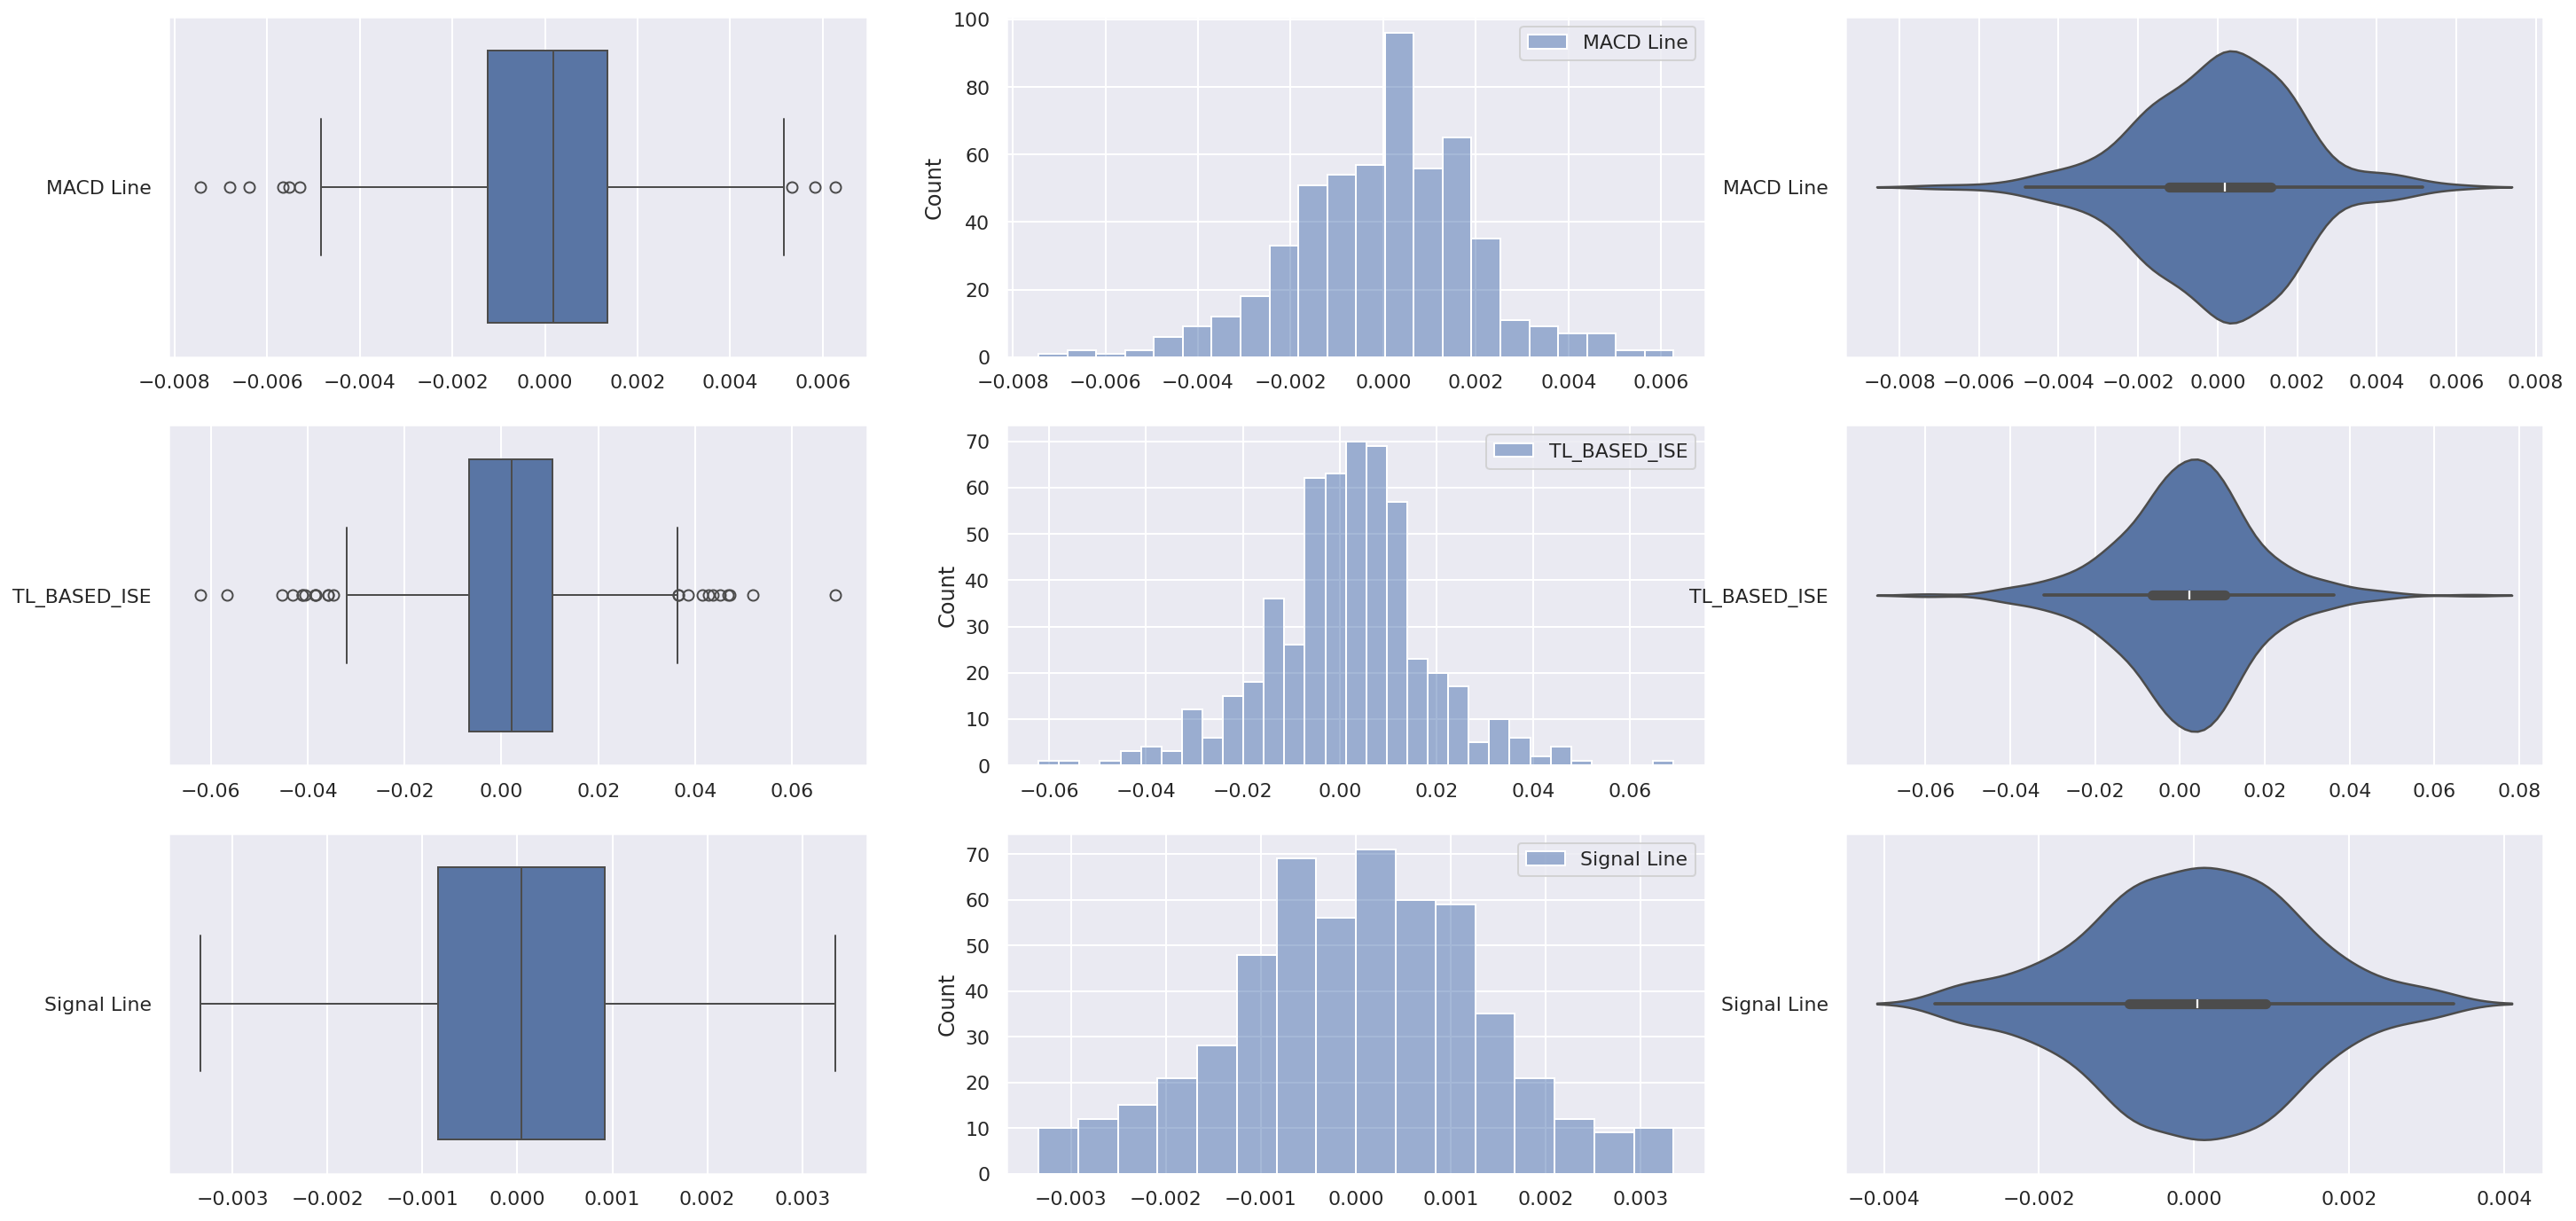

In [13]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

MACD_Line = pd.DataFrame(df_with_signals['MACD Line'])
TL_BASED_ISE = pd.DataFrame(df_with_signals['TL_BASED_ISE'])
Signal_Line = pd.DataFrame(df_with_signals['Signal Line'])


# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))


sb.boxplot(data = MACD_Line , orient = "h", ax = axes[0,0])
sb.histplot(data = MACD_Line, ax = axes[0,1])
sb.violinplot(data = MACD_Line , orient = "h", ax = axes[0,2])


sb.boxplot(data = TL_BASED_ISE , orient = "h", ax = axes[1,0])
sb.histplot(data = TL_BASED_ISE, ax = axes[1,1])
sb.violinplot(data = TL_BASED_ISE, orient = "h", ax = axes[1,2])

sb.boxplot(data = Signal_Line  , orient = "h", ax = axes[2,0])
sb.histplot(data = Signal_Line , ax = axes[2,1])
sb.violinplot(data = Signal_Line , orient = "h", ax = axes[2,2])



In [14]:
import pandas as pd

# Assuming data1 is your DataFrame with features (excluding 'Buy/Hold/Sell' and 'date' columns)
data1 = df_with_signals.drop(['Buy/Hold/Sell', 'date'], axis=1)

# Calculate quartiles and IQR for each column
q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)
iqr = q3 - q1

# Calculate outliers using IQR method for each column
outliers = ((data1 < (q1 - 1.5 * iqr)) | (data1 > (q3 + 1.5 * iqr))).sum()

# Display the number of outliers for each column
print("Number of Outliers for Each Column:")
print(outliers)


Number of Outliers for Each Column:
TL_BASED_ISE    24
SP              57
DAX             27
FTSE            28
NIKKEI          29
BOVESPA         30
EU              25
EM              25
MACD Line        9
Signal Line      0
dtype: int64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate quartiles and IQR for each index
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

# Calculate outliers using IQR method
outliers = ((data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr))

# Count outliers for each index
outlier_counts = outliers.sum()

# Calculate percentage of outliers for each index
total_rows = data.shape[0]
outlier_percentages = (outlier_counts / total_rows) * 100

# Display the percentage of outliers
print("Percentage of Outliers:")
print(outlier_percentages)

Percentage of Outliers:
TL_BASED_ISE      4.477612
USD_BASED_ISE     2.985075
SP               10.634328
DAX               5.037313
FTSE              5.223881
NIKKEI            5.410448
BOVESPA           5.597015
EU                4.664179
EM                4.664179
dtype: float64


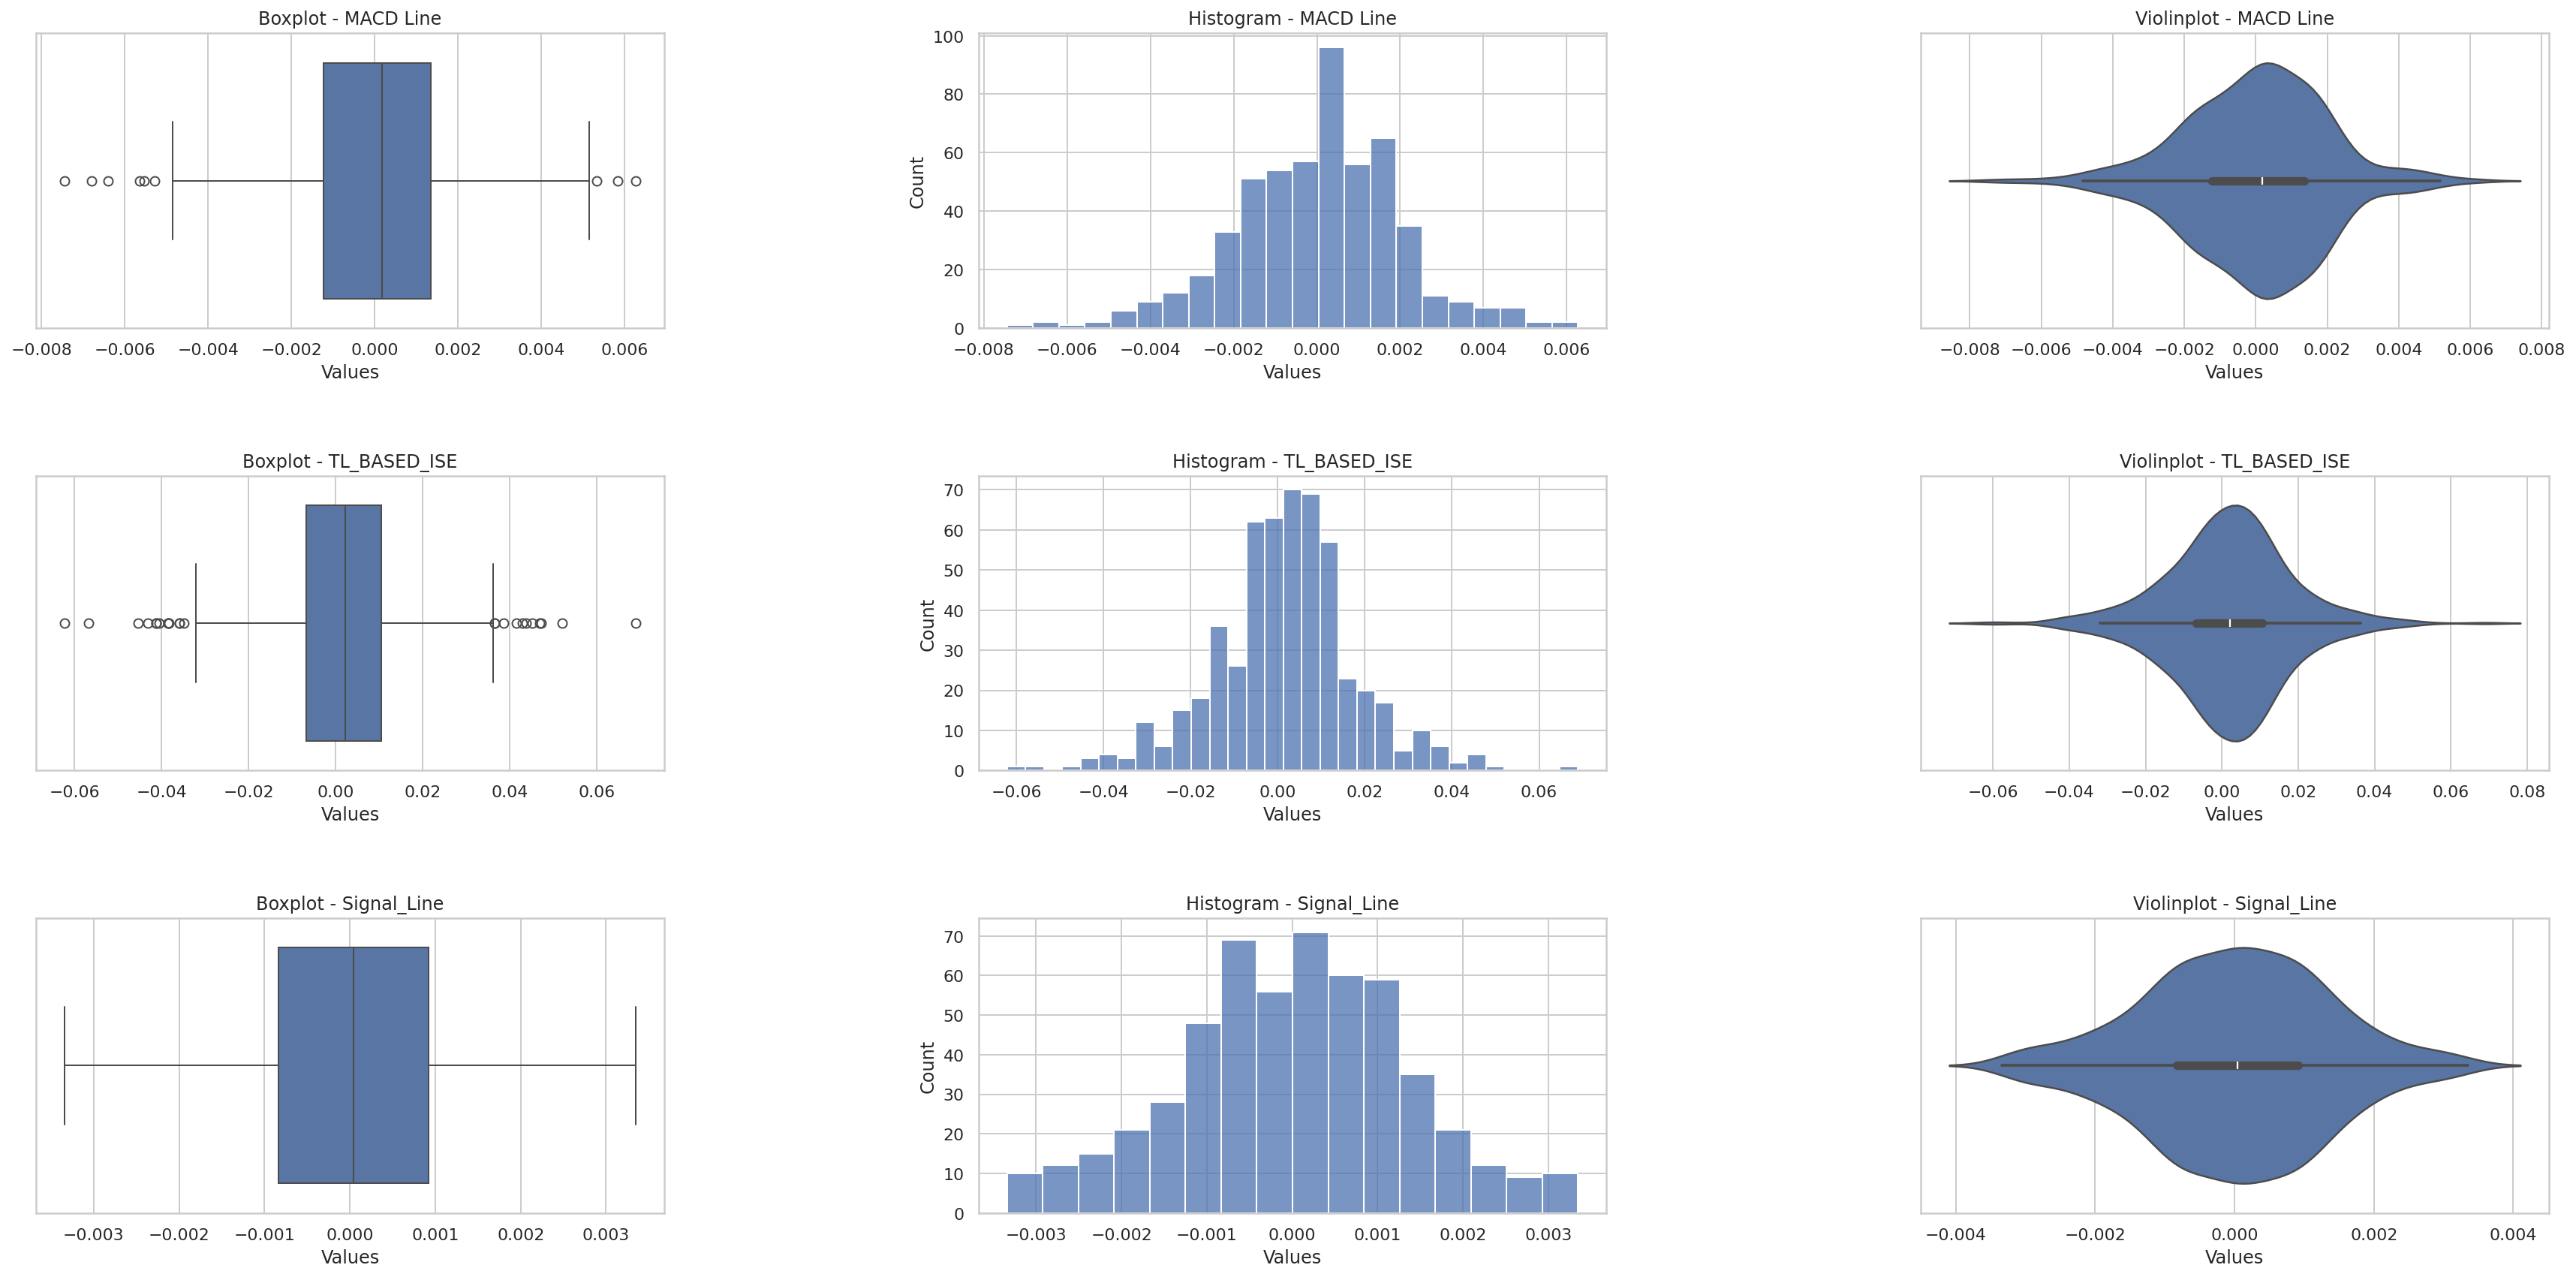

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Assuming df_with_signals contains your data and columns 'MACD Line', 'TL_BASED_ISE', and 'Signal Line'

# Set up matplotlib figure with three subplots and specify axes
fig, axes = plt.subplots(3, 3, figsize=(24, 12))

# Extract data for each plot
MACD_Line = df_with_signals['MACD Line']
TL_BASED_ISE = df_with_signals['TL_BASED_ISE']
Signal_Line = df_with_signals['Signal Line']

# Boxplot for MACD_Line
sns.boxplot(data=MACD_Line, orient="h", ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - MACD Line')
axes[0, 0].set_xlabel('Values')

# Histogram for MACD_Line
sns.histplot(data=MACD_Line, ax=axes[0, 1])
axes[0, 1].set_title('Histogram - MACD Line')
axes[0, 1].set_xlabel('Values')

# Violinplot for MACD_Line
sns.violinplot(data=MACD_Line, orient="h", ax=axes[0, 2])
axes[0, 2].set_title('Violinplot - MACD Line')
axes[0, 2].set_xlabel('Values')

# Boxplot for TL_BASED_ISE
sns.boxplot(data=TL_BASED_ISE, orient="h", ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - TL_BASED_ISE')
axes[1, 0].set_xlabel('Values')

# Histogram for TL_BASED_ISE
sns.histplot(data=TL_BASED_ISE, ax=axes[1, 1])
axes[1, 1].set_title('Histogram - TL_BASED_ISE')
axes[1, 1].set_xlabel('Values')

# Violinplot for TL_BASED_ISE
sns.violinplot(data=TL_BASED_ISE, orient="h", ax=axes[1, 2])
axes[1, 2].set_title('Violinplot - TL_BASED_ISE')
axes[1, 2].set_xlabel('Values')

# Boxplot for Signal_Line
sns.boxplot(data=Signal_Line, orient="h", ax=axes[2, 0])
axes[2, 0].set_title('Boxplot - Signal_Line')
axes[2, 0].set_xlabel('Values')

# Histogram for Signal_Line
sns.histplot(data=Signal_Line, ax=axes[2, 1])
axes[2, 1].set_title('Histogram - Signal_Line')
axes[2, 1].set_xlabel('Values')

# Violinplot for Signal_Line
sns.violinplot(data=Signal_Line, orient="h", ax=axes[2, 2])
axes[2, 2].set_title('Violinplot - Signal_Line')
axes[2, 2].set_xlabel('Values')

# Adjust layout and set y-axis to narrow
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots
plt.setp(axes[2, 2].yaxis.get_majorticklines(), markersize=2)  # Set narrow y-axis for Signal_Line Violinplot
plt.show()
